In [1]:
import sys
sys.path.append('/home/hashmi/ResearchBook/Tracking/Notebooks/Moore')
from central_import import *

figure_directory = '../../../Figures/Databuild/'
os.makedirs(figure_directory,exist_ok=True)
set_plot_style()

In [2]:
#Calling the input file
keys=['p','pt','px','py','pz','ovtx_x','ovtx_y','eta','phi','nUTHits','chi2','ndof','isMatched']
data = uproot.open('../../../../Data/TrackDumper/Downstream/Dumper_recTracks.root:Hits_detectors').arrays(keys,library='pd')

In [3]:
data

,p,pt,px,py,pz,ovtx_x,ovtx_y,eta,phi,nUTHits,chi2,ndof,isMatched
0,5909.817556,428.277705,-408.473668,128.728613,5894.278730,-154.245087,51.721882,3.316430,2.836300,4,3.530421,12,True
1,5538.734420,282.645307,-233.720748,158.943329,5531.517929,-89.850204,68.142715,3.667824,2.544377,4,1.383085,12,True
2,11578.541378,630.442231,-629.928178,25.453822,11561.365103,-123.821136,4.228925,3.602892,3.101207,4,2.131646,11,True
3,15305.070720,833.397923,-666.631128,500.155013,15282.363614,-97.630684,76.527649,3.602833,2.497917,4,2.169970,11,True
4,7032.182276,123.075688,-67.120282,103.162457,7031.105172,-14.400462,33.429001,4.738523,2.147612,4,2.621901,12,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723932,2705.815695,640.757587,602.658249,-217.654129,2628.853037,563.841492,-223.061066,2.119331,-0.346579,4,3.754890,10,True
2723933,1757.853812,294.450931,-235.569679,-176.658647,1733.017217,-294.388489,-251.786636,2.472794,-2.498142,4,10.124126,11,True
2723934,1855.819966,31.273503,19.491499,-24.456358,1855.556444,-2.628567,-35.690914,4.776387,-0.897893,6,12.017671,11,False
2723935,9518.595544,333.463123,333.445238,-3.453640,9512.752676,77.768219,0.237871,4.044311,-0.010357,6,16.974522,10,True


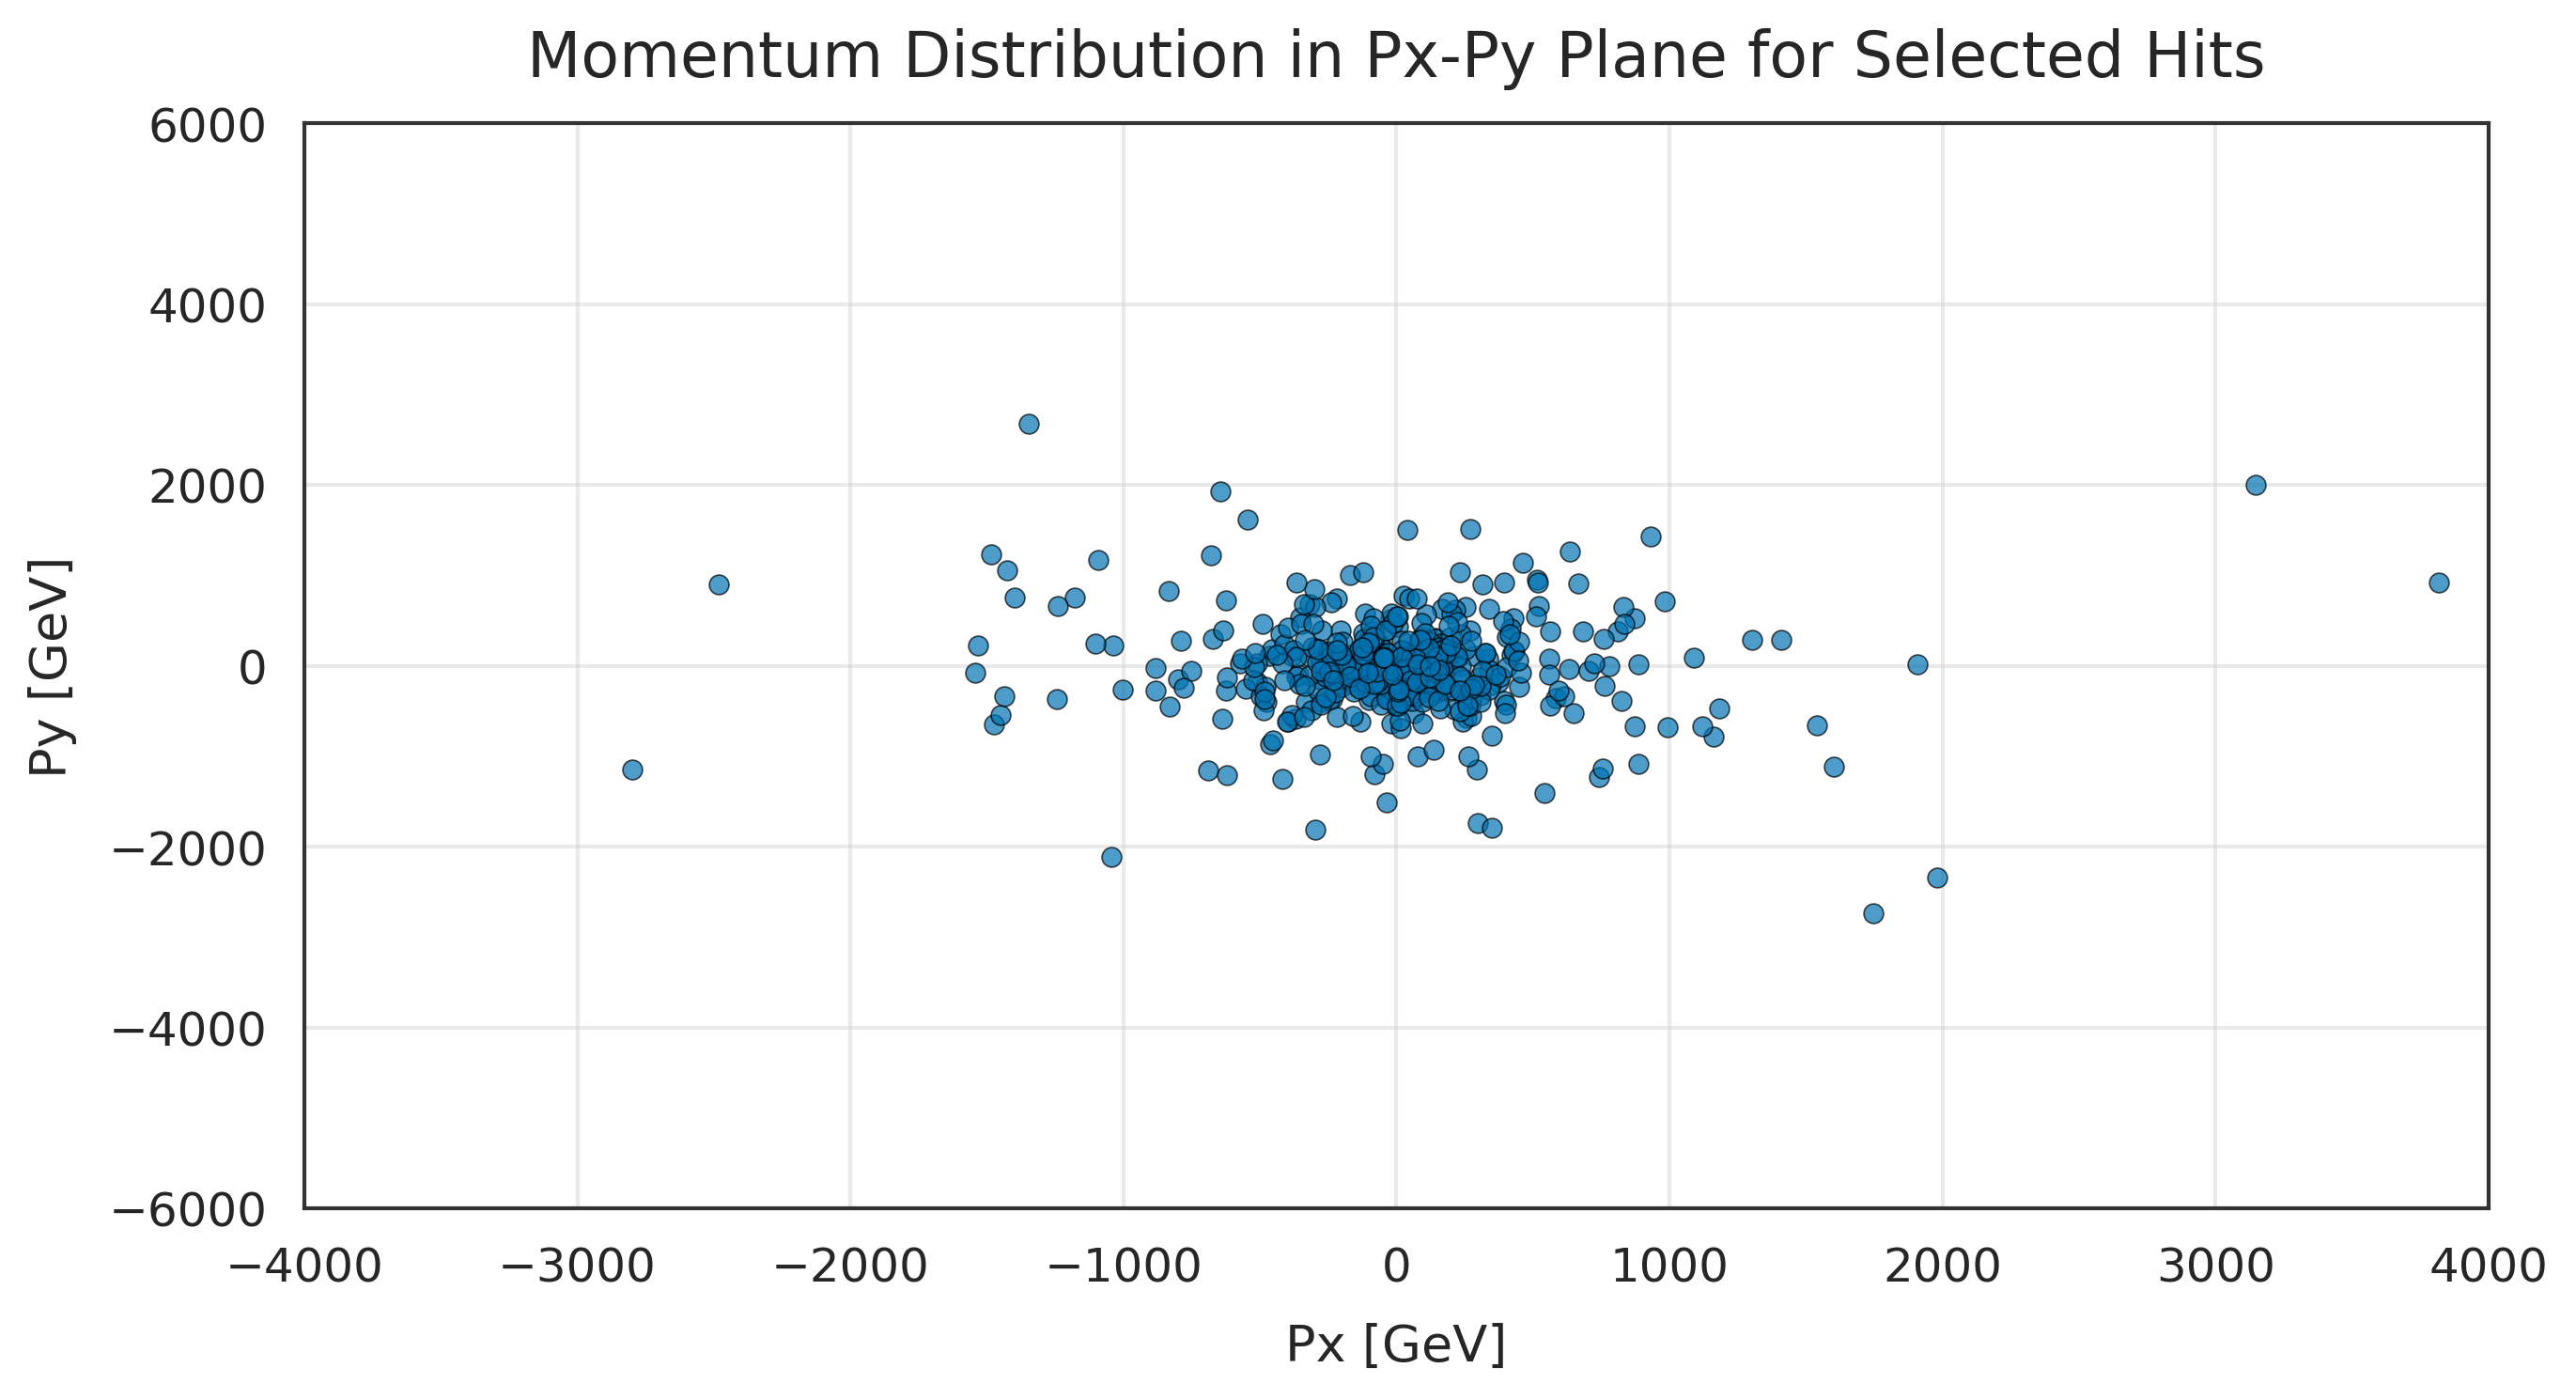

In [4]:
random_indices = np.random.choice(data.shape[0], 500, replace=False)


# Scatter plot for the selected random hits
sns.scatterplot(x=data['px'].iloc[random_indices], y=data['py'].iloc[random_indices], 
                s=25, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel('Px [GeV]')
plt.ylabel('Py [GeV]')
plt.title("Momentum Distribution in Px-Py Plane for Selected Hits")

# Set limits and grid
plt.xlim(-4000, 4000)
plt.ylim(-6000, 6000)

plt.savefig("{}/DownstreamPxPy.png".format(figure_directory))
plt.show()


In [5]:
data['tx'] = data['px'] / data['pz']
data['ty'] = data['py'] / data['pz']
data['chi2perdof'] = data['chi2'] / data['ndof']


model_data = data[['p','pt','tx','ty','ovtx_x','ovtx_y','eta','phi','nUTHits','chi2perdof','isMatched']]

In [6]:
model_data.head()

,p,pt,tx,ty,ovtx_x,ovtx_y,eta,phi,nUTHits,chi2perdof,isMatched
0,5909.817556,428.277705,-0.069300,0.021840,-154.245087,51.721882,3.316430,2.836300,4,0.294202,True
1,5538.734420,282.645307,-0.042253,0.028734,-89.850204,68.142715,3.667824,2.544377,4,0.115257,True
2,11578.541378,630.442231,-0.054486,0.002202,-123.821136,4.228925,3.602892,3.101207,4,0.193786,True
3,15305.070720,833.397923,-0.043621,0.032728,-97.630684,76.527649,3.602833,2.497917,4,0.197270,True
4,7032.182276,123.075688,-0.009546,0.014672,-14.400462,33.429001,4.738523,2.147612,4,0.218492,True


In [7]:
model_data.to_parquet('DownstreamTrackTrainingData.parquet')

In [8]:
#End of Notebook